In [1]:
# Import all of the necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Fetch historical stock data for JPMorgan (JPM) from 2008 to 2025
jpm = "JPM"

start_date = "2008-01-01"
end_date = "2025-4-26"

jpm_data = yf.download(jpm, start=start_date, end=end_date)

# Display the first five rows
print(jpm_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker            JPM        JPM        JPM        JPM       JPM
Date                                                            
2008-01-02  27.130793  28.173049  27.021421  28.018640  22122300
2008-01-03  26.944208  27.439601  26.867002  27.240156  17150700
2008-01-04  26.333023  26.892752  26.140013  26.641839  25873800
2008-01-07  26.596811  26.751221  25.837637  26.442402  25644100
2008-01-08  25.541683  26.751214  25.361539  26.674009  33646000


In [3]:
# Calculate Simple Moving Averages
short_window = 50
long_window = 200

jpm_data['SMA50'] = jpm_data['Close'].rolling(window=short_window).mean()
jpm_data['SMA200'] = jpm_data['Close'].rolling(window=long_window).mean()

In [4]:
# Define signals
jpm_data['Signal'] = 0  # Initialize Signal column with 0
jpm_data.loc[jpm_data['SMA50'] > jpm_data['SMA200'], 'Signal'] = 1  # Buy
jpm_data.loc[jpm_data['SMA50'] < jpm_data['SMA200'], 'Signal'] = -1  # Sell

In [5]:
# Calculate the change in signal to determine when a position is taken
jpm_data['Position'] = jpm_data['Signal'].diff()

# Calculate the daily return of the stock based on closing prices
jpm_data['Daily Return'] = jpm_data['Close'].pct_change()

# Calculate the return of the strategy: position * daily return
jpm_data['Strategy Return'] = jpm_data['Position'] * jpm_data['Daily Return']

# Calculate the cumulative return of simply holding the stock (market return)
jpm_data['Cumulative Market Return'] = (1 + jpm_data['Daily Return']).cumprod()

# Calculate the cumulative return of the strategy based on positions taken
jpm_data['Cumulative Strategy Return'] = (1 + jpm_data['Strategy Return']).cumprod()

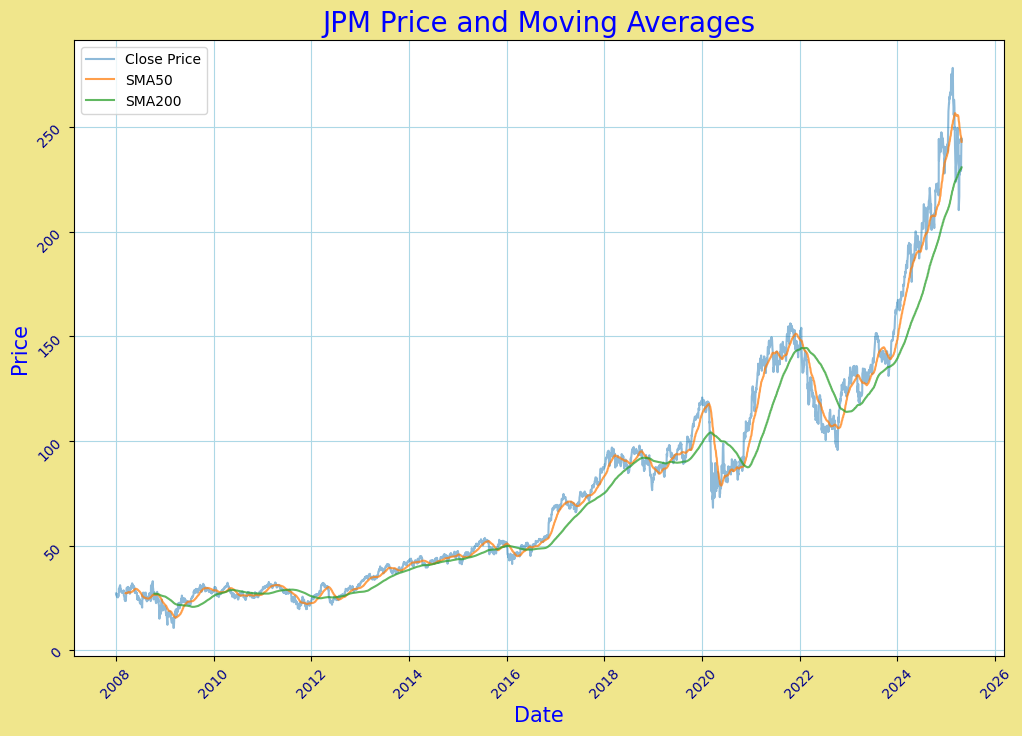

In [6]:
# Plot the close price along with 50-day and 200-day simple moving averages, with customized styling for better visualization
plt.figure(figsize=(12, 8), facecolor= 'khaki')
plt.plot(jpm_data['Close'], label='Close Price', alpha=0.5)
plt.plot(jpm_data['SMA50'], label='SMA50', alpha=0.75)
plt.plot(jpm_data['SMA200'], label='SMA200', alpha=0.75)
plt.title(f"{jpm} Price and Moving Averages", fontsize = 20, color = 'blue')
plt.xlabel("Date", fontsize = 15, color = 'blue')
plt.ylabel("Price", fontsize = 15, color = 'blue')
plt.grid(True, color = 'lightblue')
plt.xticks(rotation=45, color = 'darkblue')
plt.yticks(rotation=45, color = 'darkblue')
plt.legend()
plt.show()

Citations

https://www.geeksforgeeks.org/automated-trading-using-python/